In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import trange

# %matplotlib_inline
import matplotlib.pyplot as plt

def plot(src, cmap=None, title=None, size=(10, 10)):
    %matplotlib inline
    plt.rcParams['figure.figsize'] = size
    plt.imshow(src, cmap)
    plt.title(title)

In [2]:
from infrastructure.interface import DetectionData, ClassificationData
from service.interface import FrameData

from infrastructure.detection import DummyDetector
from infrastructure.classification import DummyClassifier

from service.emotion_service import DummyEmotionService, EmotionService

### Init models

In [3]:
# detector = DummyDetector(model_path='None', conf_thresh=0.9)
# classifier = DummyClassifier(model_path='None', conf_thresh=0.9)

# service = DummyEmotionService(detector, classifier)

In [4]:
from infrastructure.detection import RetinaTorchDetector

from infrastructure.classification import DanClassifier

detector = RetinaTorchDetector(model_path='infrastructure/retina_torch/config.json', conf_thresh=0.9)
classifier = DanClassifier(model_path='models/affecnet7_epoch6_acc0.6569.pth')
# classifier = DummyClassifier(model_path='None', conf_thresh=0.9)

service = EmotionService(detector, classifier)

In [5]:
import os
video_path = 'test.mp4'

capture = cv2.VideoCapture(video_path)
length = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
# width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
width = 2000
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

fps = 10
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
writer = cv2.VideoWriter(f'output/{os.path.basename(video_path)}', fourcc, fps, (width, height))

for _ in trange(length):
    ret, frame = capture.read()
    if frame is None:
        break
    new_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    plotted_frame = service.process_frame(new_frame)
    
    writer.write(cv2.cvtColor(plotted_frame, cv2.COLOR_RGB2BGR))

writer.release() 
capture.release()

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [01:41<00:00,  5.01it/s]


In [6]:
plotted_frame.shape

(720, 2000, 3)

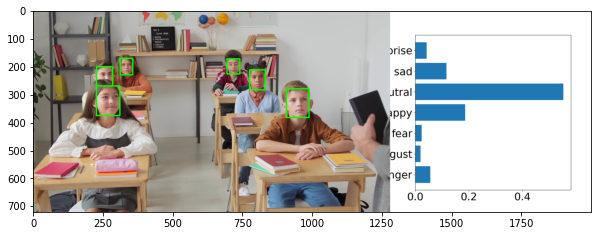

In [7]:
plot(plotted_frame)

In [8]:
from retinaface import RetinaFace

ModuleNotFoundError: No module named 'retinaface'

In [ ]:
plot(frame)

In [ ]:
model = RetinaFace()

# faces = model.detect_faces(frame)

faces = model.predict(frame)

In [ ]:
faces

In [ ]:
for i, face in enumerate(faces.values()):
    print(i, face)

In [ ]:
plot(faces[5])

In [ ]:
a = [1, 2, 4]

c, b, d = a

In [ ]:
c